# Civil Engineering Project Evaluation

This is a an ML project in the civil engineering domain . This dataset is taken from kaggle titled 'GlobalInfra Corp: Project-Based Engineer Performance Dataset' and used for learning purpose only.
Objective:
You are an analyst at GlobalInfra Corp, a multinational civil engineering firm overseeing over 1,000,000 projects worldwide. Each row in this dataset represents a single project assignment to an engineer.

Your primary goal is to use this rich dataset of project- and person-level attributes to uncover insights and practice data analysis techniques relevant to civil engineering operations.

Features                   Representations of features

Project ID:                Unique project identifier (1–1,000,000)
Certificates:	           Number of professional certificates the assigned engineer holds
Years of Experience:	   Total years of experience the engineer has in civil/construction roles
age:	                   Engineer’s age in years
Time Arrival Strafe:	   Minutes early (negative) or late (positive) relative to scheduled site check-in
Project Cost:              Total contract value of the project (in USD)
Project Proximity:	       Distance (km) from engineer’s base location to the project site
Violation Risk Index:	   Safety-violation risk score (0 = no risk, 1 = very high risk)
Company PCAB Score: 	   GlobalInfra’s internal project accreditation score (1 = low, 5 = excellent)
Weekly Overtime Hours:	   Average overtime hours logged by the engineer each week
Salary Bracket:	           Engineer’s salary bracket (1 = entry-level, 5 = executive)
is_good:  	               1 = High Performing Engineer, 0 = Needs Improvement


### Importing  dataset and required libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


In [34]:
df = pd.read_csv("D:/Downloads/Civil Engineering Global Project Data.csv")

In [35]:
# ROWS AND COLUMNS 
df.shape

(1000000, 12)

In [36]:
# DATA TYPES OF FEATURES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Project ID             1000000 non-null  int64  
 1   Certificates           1000000 non-null  int64  
 2   Years of Experience    1000000 non-null  int64  
 3   age                    1000000 non-null  int64  
 4   Time Arrival Strafe    1000000 non-null  float64
 5   Project Cost           1000000 non-null  float64
 6   Project Proximity      1000000 non-null  float64
 7   Violation Risk Index   1000000 non-null  float64
 8   Company PCAB Score     1000000 non-null  int64  
 9   Weekly Overtime Hours  1000000 non-null  float64
 10  Salary Bracket         1000000 non-null  int64  
 11  is_good                1000000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 91.6 MB


In [37]:
# FIRST 5 ROWS
df.head()

,Project ID,Certificates,Years of Experience,age,Time Arrival Strafe,Project Cost,Project Proximity,Violation Risk Index,Company PCAB Score,Weekly Overtime Hours,Salary Bracket,is_good
0,864629,0,5,45,5.26,141144.0,111.56,0.63,2,5.0,2,1
1,232937,12,7,34,2.66,1005257.0,131.46,0.31,3,5.0,3,0
2,987674,0,4,21,5.39,51424.0,100.31,0.52,3,3.0,1,0
3,128508,1,3,52,0.99,186154.0,123.69,0.67,3,10.0,1,0
4,139393,1,2,46,1.41,135718.0,101.17,0.66,2,4.0,1,0


In [38]:
# SUMMARY OF NUMERICAL COLUMNS
df.describe()

,Project ID,Certificates,Years of Experience,age,Time Arrival Strafe,Project Cost,Project Proximity,Violation Risk Index,Company PCAB Score,Weekly Overtime Hours,Salary Bracket,is_good
count,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000
mean,499999.500000,6.36699,5.008628,30.689284,0.496139,5.513406e+05,114.530015,0.431012,2.933225,4.095588,2.150000,0.50013
std,288675.278932,5.71089,1.977987,10.532012,9.764183,4.524546e+05,14.784617,0.191105,0.858342,2.224638,1.194781,0.50000
min,0.000000,0.00000,0.000000,18.000000,-51.320000,1.000000e+00,62.660000,0.080000,1.000000,0.000000,1.000000,0.00000
25%,249999.750000,0.00000,4.000000,22.750000,-5.000000,9.986675e+04,102.940000,0.250000,2.000000,3.000000,1.000000,0.00000
50%,499999.500000,6.00000,5.000000,28.000000,1.980000,5.587880e+05,117.670000,0.400000,3.000000,4.000000,2.000000,1.00000
75%,749999.250000,12.00000,6.000000,35.000000,6.170000,1.000004e+06,127.100000,0.600000,4.000000,6.000000,3.000000,1.00000
max,999999.000000,17.00000,14.000000,60.000000,82.920000,1.253680e+06,144.160000,0.900000,5.000000,15.000000,5.000000,1.00000


In [39]:
# CHECKING FOR NULL VALUES
df.isnull().sum()

Project ID               0
Certificates             0
Years of Experience      0
age                      0
Time Arrival Strafe      0
Project Cost             0
Project Proximity        0
Violation Risk Index     0
Company PCAB Score       0
Weekly Overtime Hours    0
Salary Bracket           0
is_good                  0
dtype: int64

### Taking counts of categorical features

In [40]:
df['Company PCAB Score'].value_counts()

Company PCAB Score
2    352038
3    324791
4    301171
1     14977
5      7023
Name: count, dtype: int64

In [41]:
df['Salary Bracket'].value_counts()

Salary Bracket
1    400000
2    250000
3    200000
4    100000
5     50000
Name: count, dtype: int64

In [42]:
df['is_good'].value_counts()

is_good
1    500130
0    499870
Name: count, dtype: int64

In [43]:
# DROPPING THE CATGORICAL TYPE COLUMNS 
df_num = df.drop(columns={'Company PCAB Score','Salary Bracket','is_good'})

### Correlation Analysis of Numerical features

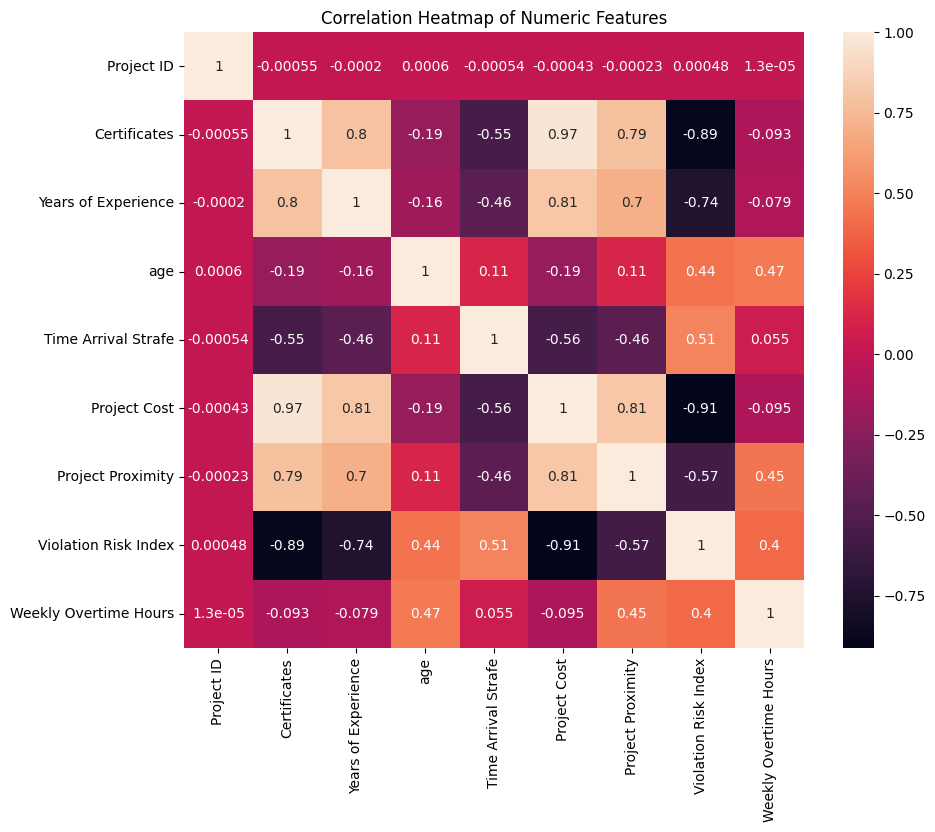

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(),annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


There is high correlation between independent features : Project cost and certificates, Project cost and project proximity, Project cost and years of experience,certificates and years of experience.

In [45]:
df_2 = df.drop({'Project Proximity','Certificates'},axis = 1)
df_2.head()

,Project ID,Years of Experience,age,Time Arrival Strafe,Project Cost,Violation Risk Index,Company PCAB Score,Weekly Overtime Hours,Salary Bracket,is_good
0,864629,5,45,5.26,141144.0,0.63,2,5.0,2,1
1,232937,7,34,2.66,1005257.0,0.31,3,5.0,3,0
2,987674,4,21,5.39,51424.0,0.52,3,3.0,1,0
3,128508,3,52,0.99,186154.0,0.67,3,10.0,1,0
4,139393,2,46,1.41,135718.0,0.66,2,4.0,1,0


### Comparing the target variable with other features.

<Axes: xlabel='is_good', ylabel='Years of Experience'>

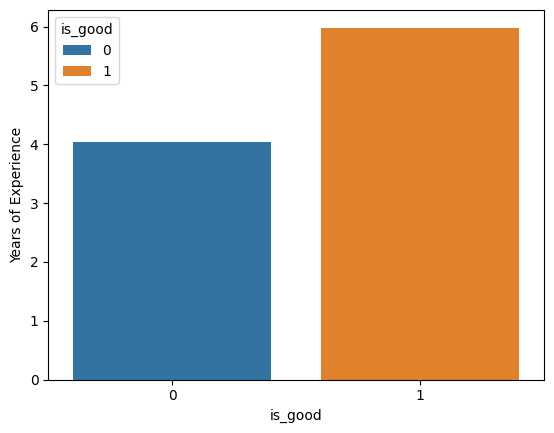

In [46]:
sns.barplot(data=df_2,y='Years of Experience',x='is_good',hue='is_good')

<Axes: xlabel='is_good', ylabel='Project Cost'>

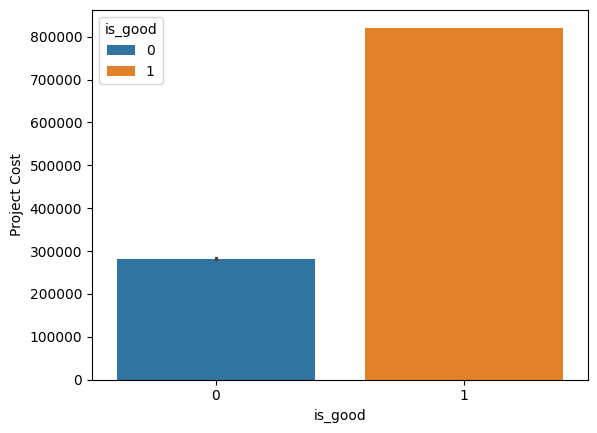

In [47]:
sns.barplot(data=df_2,y='Project Cost',x='is_good',hue='is_good')

<Axes: xlabel='is_good', ylabel='Violation Risk Index'>

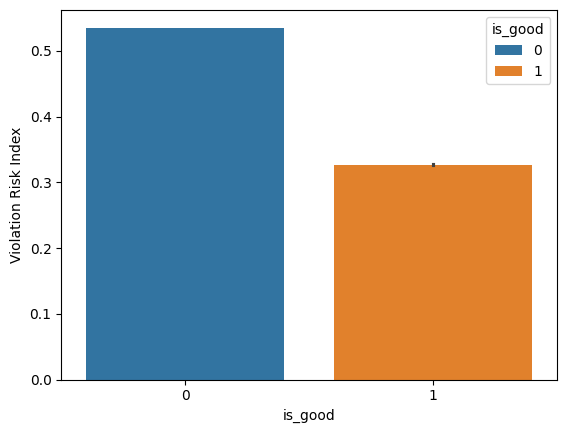

In [48]:
sns.barplot(data=df_2,y='Violation Risk Index',x='is_good',hue='is_good')

<Axes: xlabel='is_good', ylabel='Company PCAB Score'>

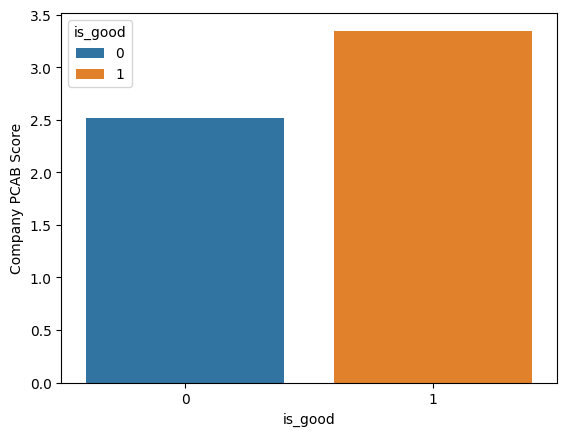

In [49]:
sns.barplot(data=df_2,y='Company PCAB Score',x='is_good',hue='is_good')

<Axes: xlabel='is_good', ylabel='Weekly Overtime Hours'>

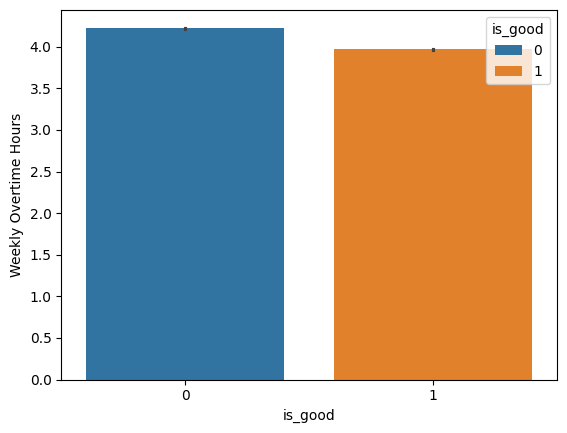

In [50]:
sns.barplot(data=df_2,y='Weekly Overtime Hours',x='is_good',hue='is_good')

<Axes: xlabel='is_good', ylabel='Salary Bracket'>

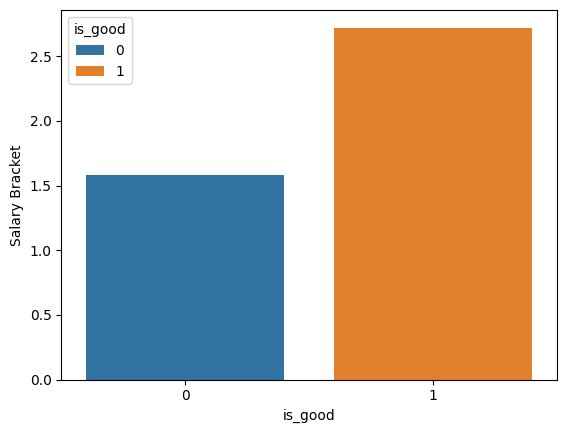

In [51]:
sns.barplot(data=df_2,y='Salary Bracket',x='is_good',hue='is_good')

### Distributions of features

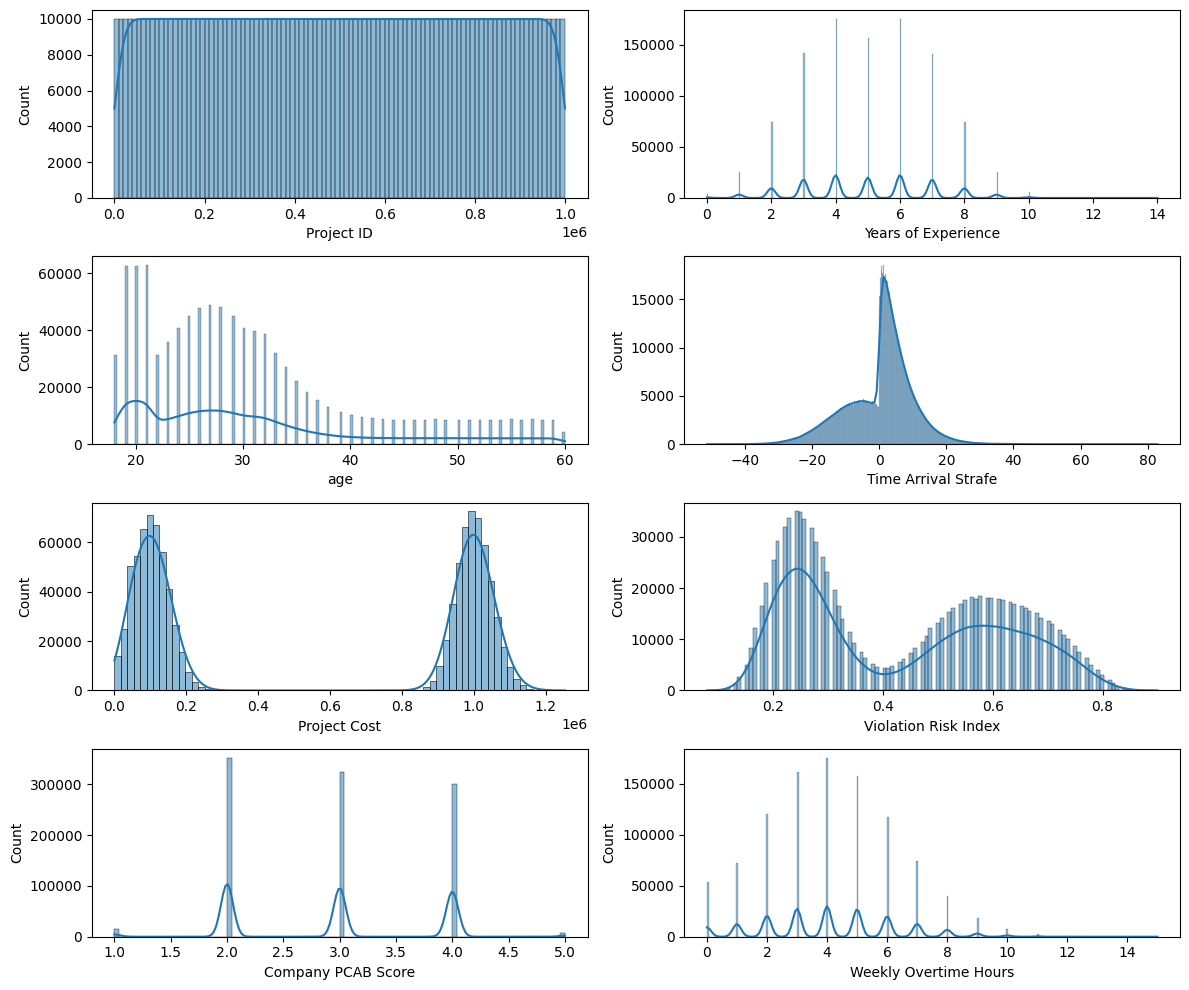

In [52]:
fig,axes=plt.subplots(figsize=(12,10),nrows=4,ncols=2)

axes = axes.flatten()

for i in range(8):
    sns.histplot(df_2,x=df_2.columns[i],ax=axes[i],kde=True)
    axes[i].set_xlabel(f"{df_2.columns[i]}")
plt.tight_layout()
plt.show()

In [53]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Project ID             1000000 non-null  int64  
 1   Years of Experience    1000000 non-null  int64  
 2   age                    1000000 non-null  int64  
 3   Time Arrival Strafe    1000000 non-null  float64
 4   Project Cost           1000000 non-null  float64
 5   Violation Risk Index   1000000 non-null  float64
 6   Company PCAB Score     1000000 non-null  int64  
 7   Weekly Overtime Hours  1000000 non-null  float64
 8   Salary Bracket         1000000 non-null  int64  
 9   is_good                1000000 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 76.3 MB


<Axes: >

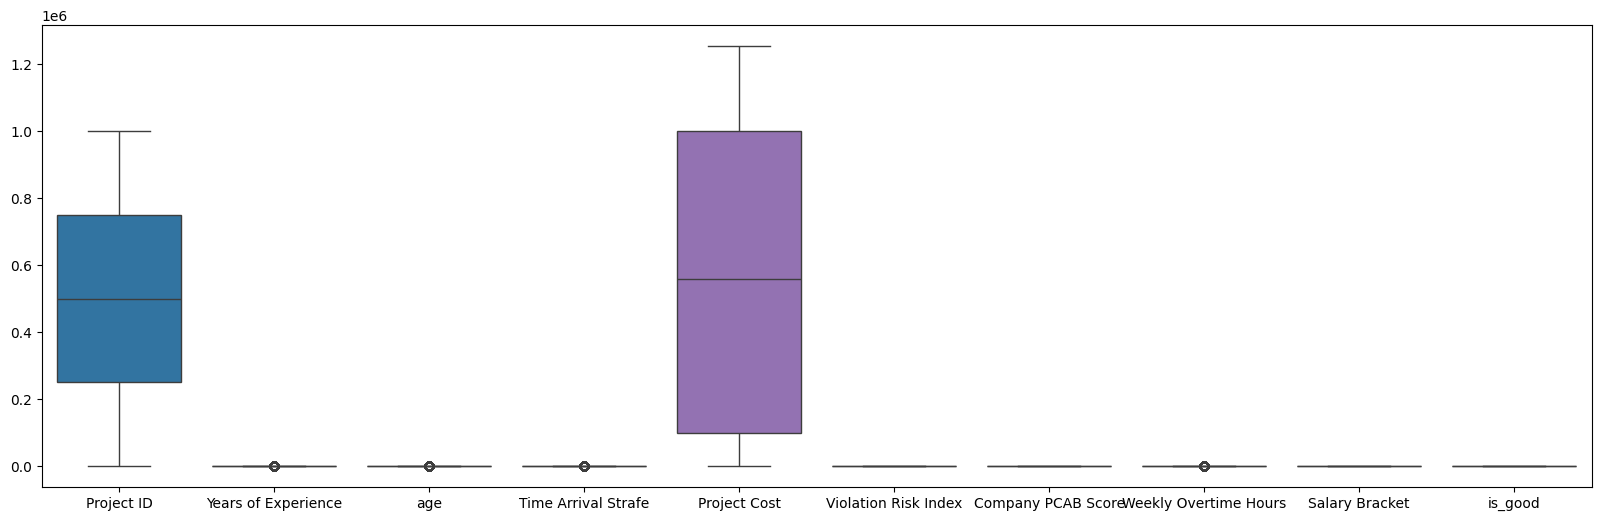

In [60]:
plt.figure(figsize=(20,6))
sns.boxplot(df_2)

### Feature Scaling

In [61]:
from sklearn.preprocessing import RobustScaler

target = 'is_good'
scaler = RobustScaler()

feature_columns = [col for col in df_2.columns if col != target]
df_2[feature_columns] = scaler.fit_transform(df_2[feature_columns])


### Train-Test-Split

In [62]:
X = df_2.drop(columns = {'Project ID','is_good'})
y = df_2['is_good']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800000, 8)
(800000,)
(200000, 8)
(200000,)


### Model Fitting,Prediction and Model Evaluation

#### Logistic Regression

In [65]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy*100)

Accuracy Score: 79.753


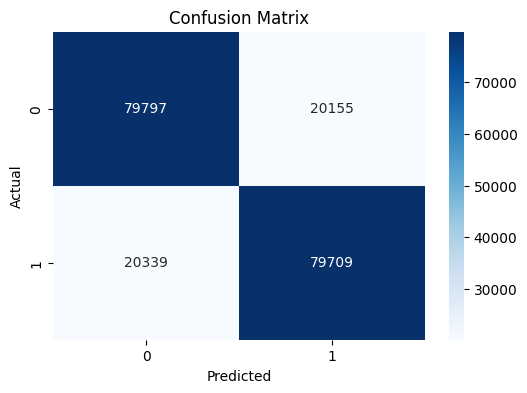

In [66]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

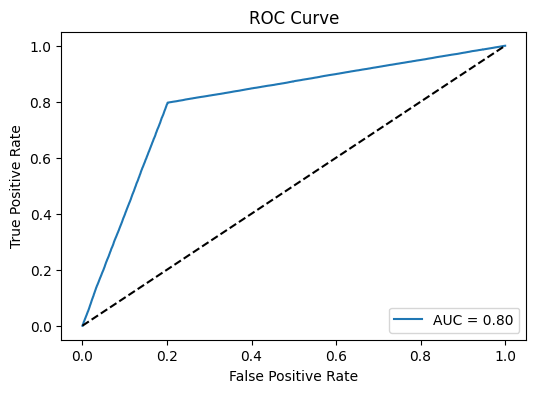

In [67]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Decision Tree Classifier

Accuracy: 66.38
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     99952
           1       0.66      0.66      0.66    100048

    accuracy                           0.66    200000
   macro avg       0.66      0.66      0.66    200000
weighted avg       0.66      0.66      0.66    200000



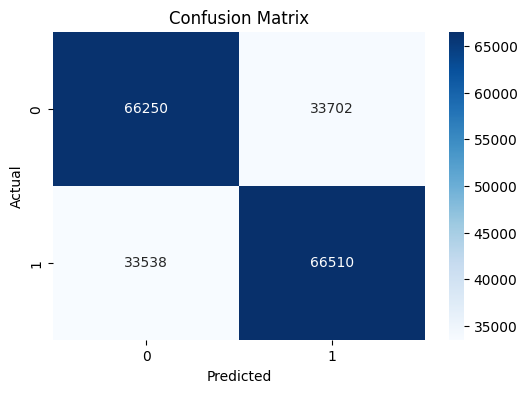

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)
y_pred_dtc = clf.predict(X_test)

from sklearn import metrics
accuracy_dtc = metrics.accuracy_score(y_test,y_pred_dtc)
print("Accuracy:",accuracy_dtc*100)
print(classification_report(y_test, y_pred_dtc))

cm = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Random Forest Classifier

Accuracy: 79.297
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     99952
           1       0.79      0.79      0.79    100048

    accuracy                           0.79    200000
   macro avg       0.79      0.79      0.79    200000
weighted avg       0.79      0.79      0.79    200000



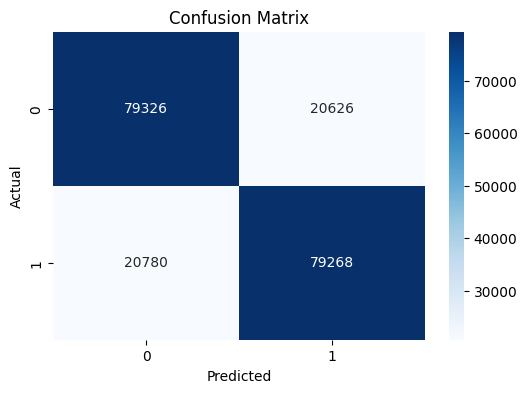

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf =rf.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print("Accuracy:",accuracy_rf*100)
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

### Observations

#### Accuracies

Model_1 : Logistic regression(79.53%) 

Model_2 : DecisionTree Classifier(66.38%)

Model_3 : Random Forest Classifierr(79.29%)

We can conclude that the Logistic Regresion model has performed well when compared to decision tree and random forest models.

